In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
import numpy as np

In [2]:
# reading data
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# For the sake of data analysis, concatenating both train and test
sales = pd.concat([train,test])

# Exploring Data
Below, data of each csv will be explored and insights will be noted

## Sales

In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
sales.info() # no empty, date needs reformatting

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 115063
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         536634 non-null  int64  
 1   Dept          536634 non-null  int64  
 2   Date          536634 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     536634 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 21.0+ MB


In [6]:
sales['Date'] = pd.to_datetime(sales['Date'], format='%Y-%m-%d', errors='ignore')

In [7]:
sales.describe()

,Store,Dept,Weekly_Sales
count,536634.000000,536634.000000,421570.000000
mean,22.208621,44.277301,15981.258123
std,12.790580,30.527358,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


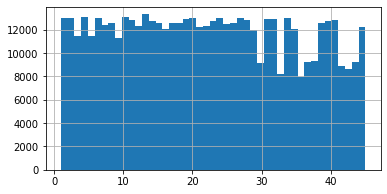

In [8]:
sales['Store'].hist(figsize=(6,3), bins=45)
plt.show()

 few stores such as store 30, 33 and 36 contain between 20% and 40% lesser entries

Below, lets plot the average weekly sales of walmart

In [9]:
# getting the average sales per week (averaging over all the stores)
group = sales[['Weekly_Sales', 'Date']].groupby(['Date']).mean()
group.head()

,Weekly_Sales
Date,
2010-02-05,16836.121997
2010-02-12,16352.056032
2010-02-19,16216.658979
2010-02-26,14899.549688
2010-03-05,15921.015727


In [10]:
group.index[0]

Timestamp('2010-02-05 00:00:00')

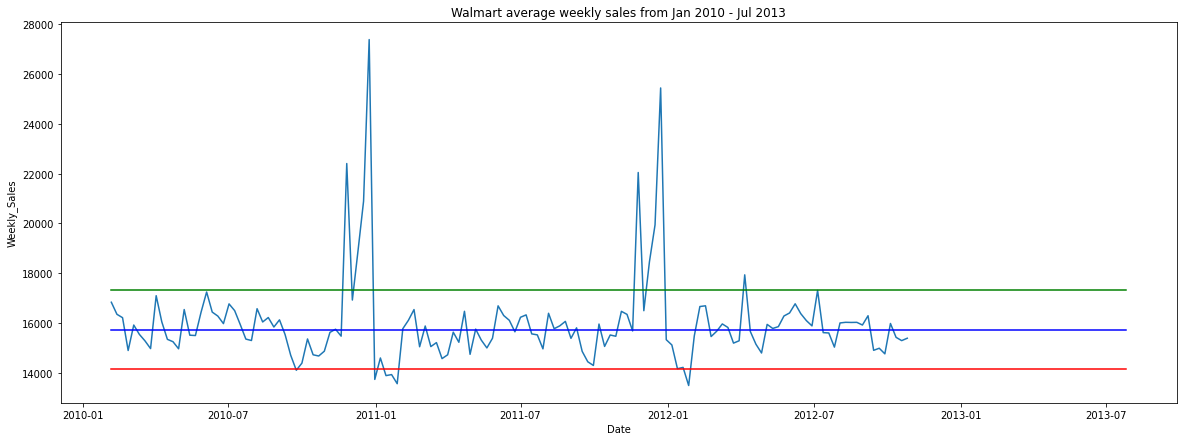

In [11]:
# plotting the average sales over time
fig, ax = plt.subplots(figsize=(20,7))
sns.lineplot(data=group, x='Date', y='Weekly_Sales', ax=ax)
ax.set_title('Walmart average weekly sales from Jan 2010 - Jul 2013')

# calculate the average weekly sales without the seasonal spikes
avg_without_seasonal = group[group.Weekly_Sales < 22_000].mean()
# plot a line to indicate the average
plt.plot([group.index[0],group.index[-1]],[avg_without_seasonal,avg_without_seasonal], 'b')

upper_bound = avg_without_seasonal + avg_without_seasonal*0.10
lower_bound = avg_without_seasonal - avg_without_seasonal*0.10

plt.plot([group.index[0],group.index[-1]],[upper_bound,upper_bound], 'g')
plt.plot([group.index[0],group.index[-1]],[lower_bound,lower_bound], 'r')
plt.show()

In [12]:
avg_without_seasonal[0]

15736.728473122686

As seen above, The average weekly sales of Walmart is around around 15,736 USD per week, with a fluctuation of 10%.

Seasonality can be seen at the end of November and December (Thanksgiving and Christmas) which causes the sales to spike, However, this is followed by a drastic decline in sales on late January of the following year. Promotions during these decline periods could be leveraged to increase sales.

below, dates when prices were off the usual are highlighted.

In [13]:
# Highlighting unusual increase in weekly sales 
group[group.Weekly_Sales > upper_bound[0]]

,Weekly_Sales
Date,
2010-11-26,22403.336705
2010-12-10,18882.893619
2010-12-17,20892.463619
2010-12-24,27378.692693
2011-11-25,22043.563476
2011-12-09,18458.853056
2011-12-16,19942.149333
2011-12-23,25437.146122
2012-04-06,17935.741157


In [14]:
# Highlighting unusual decrease in weekly sales
group[group.Weekly_Sales < lower_bound[0]]

,Weekly_Sales
Date,
2010-09-24,14105.905324
2010-12-31,13738.538566
2011-01-14,13891.283484
2011-01-21,13932.367385
2011-01-28,13566.239462
2012-01-27,13494.232612


## Features

In [15]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
# date needs reformating
features.info() # markdowns, CPI, Unemployment contain missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Text(0.5, 1.0, 'Features')

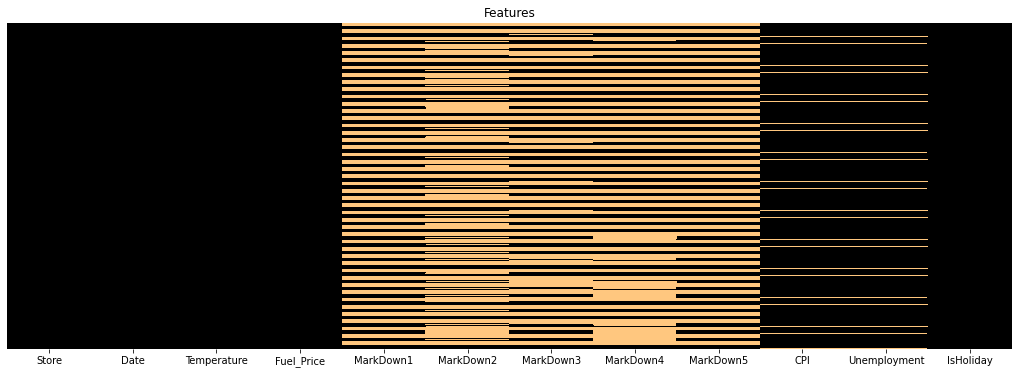

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

# This is a plot to show the missing values in features dataset
sns.heatmap(features.isnull(), yticklabels=False, ax = ax, cbar=False, cmap='copper')
ax.set_title('Features')

In [18]:
def missing_percentage(df, cols, verbose = 1, threshold = 0.00, return_output=False):
    '''
    This function calculates the percentage of missing enteries in each column in cols
    Threshold is a percentage of which the feature will only be shown if the percentage
    of missing data in the feature is more than the percentage specified
    '''
    result = []
    for col in cols:
        
        # calculate the percentage of missing data in the column
        percentage = df[col].isna().sum() / df[col].shape[0]
        
        # user wants to see the percentage of every column
        if verbose == 2:
            print("Missing data in {} is {:.2%}".format(col,percentage))
            
        # user only wants to see for columns which actually has missing data
        elif verbose == 1 and percentage > float(threshold):
            print("Missing data in {} is {:.2%}".format(col,percentage))
            
        # this is used with return output to return columns which the missing
        # data percentage is above the specified threshold
        if percentage > float(threshold):
            result.append(col)
            
    if return_output:
        return result
    
# showing the percentage of missing data in each columns with missing data
missing_percentage(features, features.columns.values, verbose=1)

Missing data in MarkDown1 is 50.77%
Missing data in MarkDown2 is 64.33%
Missing data in MarkDown3 is 55.89%
Missing data in MarkDown4 is 57.70%
Missing data in MarkDown5 is 50.55%
Missing data in CPI is 7.14%
Missing data in Unemployment is 7.14%


All the markdown features contain above 50% missing values

In [19]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [20]:
features['Date'] = pd.to_datetime(features['Date'], format='%Y-%m-%d', errors='ignore')

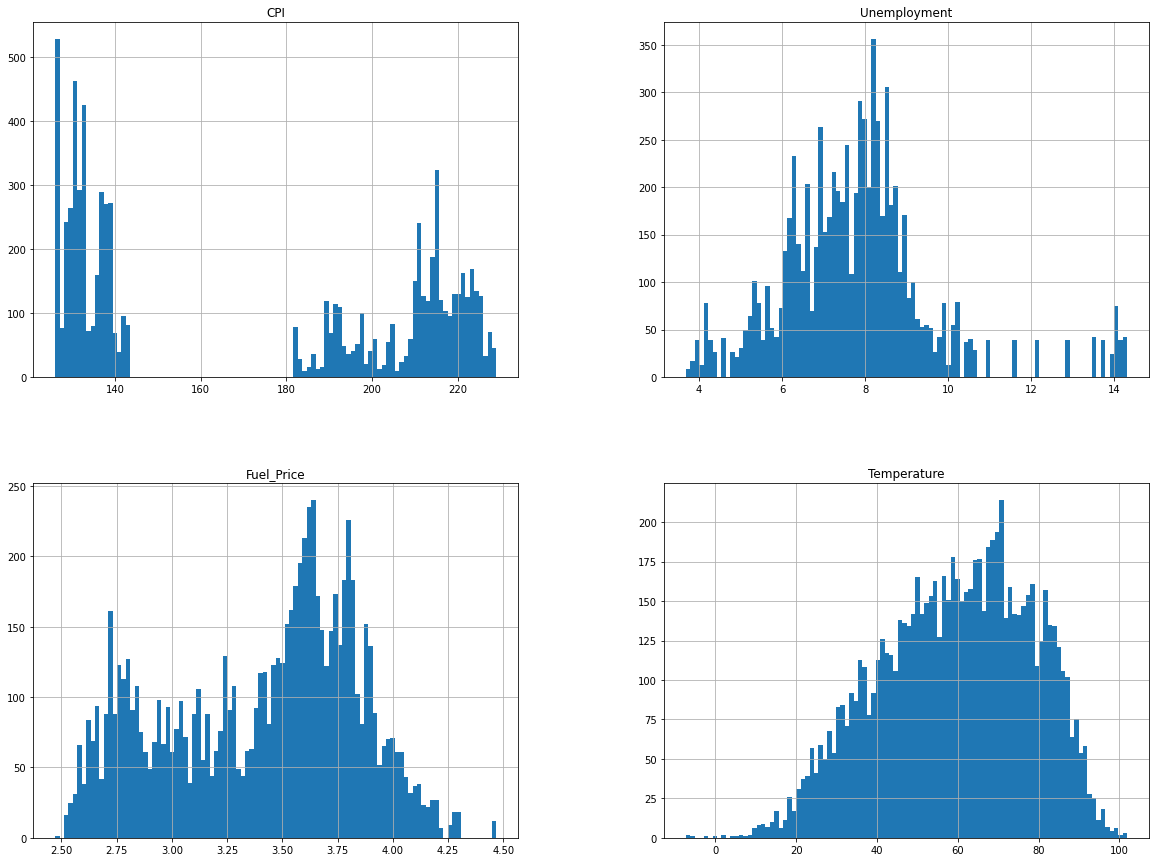

In [21]:
features[['CPI','Unemployment','Fuel_Price', 'Temperature']].hist(figsize=(20,15), bins=100)
plt.show()

##### CPI (Consumer Price Index): 
It is the weighted average price of a basket of consumer goods, changes in CPI are used to assess price changes associated with the cost of living which identifies periods of inflation / deflation. For example a CPI value of 126 indicates a rise in the inflation by 26%.

In the dataset, two major groups can be seen, the first group has an inflation ranging from 26% to around 50% which is relatively low compared to the second group. The second group has inflation from around 82% up to 128.9% which is considered extremely high in comparison with the first group. The average inflation is roughly around 72%.

##### Unemployment rate:
It is the rate of unimployed people who live in the region of a specific store. The minimum rate is 3.7% and maximum is 14.3%, majority of datapoints fall below the 11% rate.


##### Temprature:
It is the temprature recorded in the region of the store in fahrenheit.

##### Fuel Price
It is the fuel price in the region.

## Stores

In [22]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [23]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [24]:
# there is a total of 45 unique stores
stores.Store.nunique()

45

In [25]:
# there is a total of 3 unique types of stores (A, B and C)
stores.Type.unique()

array(['A', 'B', 'C'], dtype=object)

In [26]:
stores[['Type','Store']].groupby('Type').count()

,Store
Type,
A,22
B,17
C,6


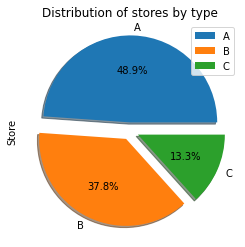

In [27]:
# distribution of stores based on Type
stores[['Type','Store']].groupby('Type').count().plot.pie(y='Store', title='Distribution of stores by type',\
                                                          autopct='%1.1f%%', shadow=True, explode=(0.1,0.1,0.1))
plt.show()

As we see from the pie chart above, almost half of the stores are of type A, 37.8% of type B and only 13.3% of size C.

Below, lets check the relation of the type of the store to store size.

<AxesSubplot:xlabel='Store', ylabel='Size'>

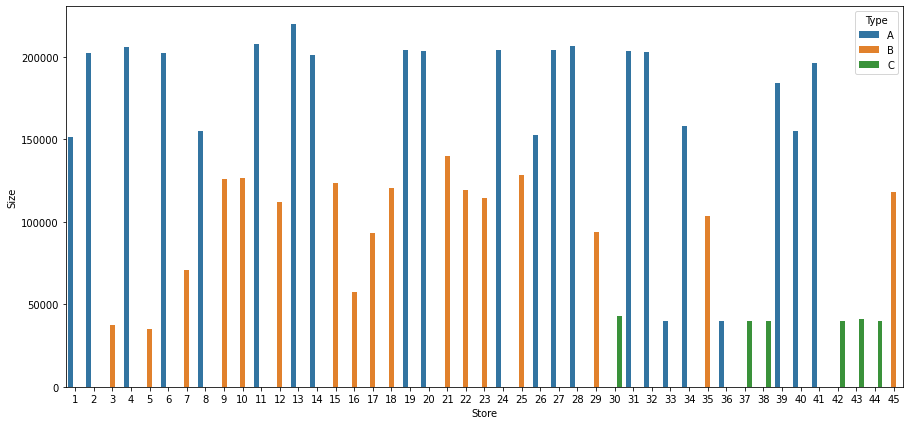

In [28]:
# plotting the size of each store
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=stores, x='Store', y='Size', hue='Type', ax=ax)

We can notice that store of type C are relatively small in size as seen in stores 30, 37 and 38. 

Type B contains mostly mid size stores as seen highlighted in orange in the plot, but also contains stores which size is equivelent to type c stores. 

Type A stores mostly relatively big in size as seen highlighted in blue in the plot, however, there exists few stores which size is equivilent to type C.

This raises a question, could the small stores in type B and A be mislabeled ? or there is a correlation between Type and other feature in the dataset. 

# Correlation of features

checking the correlation between features

In [29]:
# merging all the features
df = pd.merge(pd.merge(sales, stores, on='Store'), features.drop('IsHoliday',axis=1), on=['Store','Date'])


<AxesSubplot:>

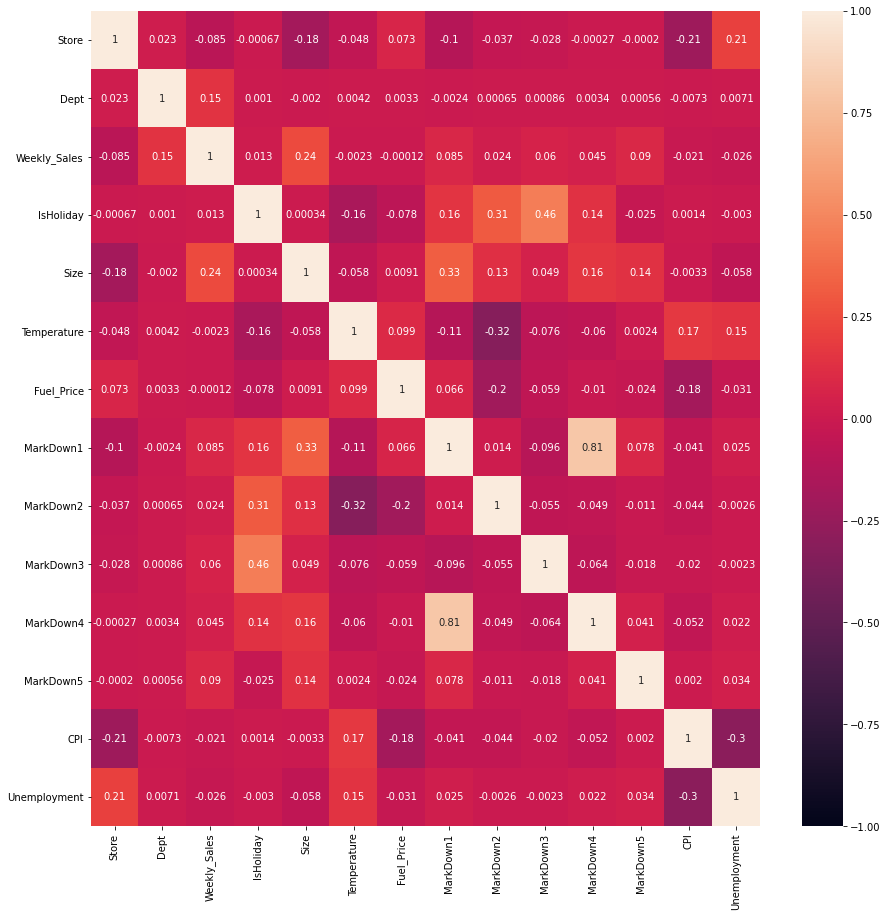

In [30]:
# plotting the correlation between features
fig, ax = plt.subplots(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, ax=ax)

Unfortunately, there are no strong correlations between features (except markdown). However, we can observe the following:

- There is a weak negative correlation between CPI and Unemployement (-0.3), this could mean that the average pay for a basket of goods is less in few stores which are in a region with high unemployment rate.

- MarkDown3 is weakly correlated to Holiday, promotional markdown of this type could be offered mostly during hiliday seasons.

- There is a strong correlation between markdown1 and markdown4 which indicates that they might occur together.

# Departments correlation with seasonal spikes

Since there are many departments, plotting them all will clutter the plot, hence, only departments which caused the increase in sales during the season will be shown.

In [31]:
# grouping by department and date
group = df[['Dept','Date','Weekly_Sales']].groupby(['Dept','Date']).sum().reset_index()

# temp will be used to get the department responsible for the high sales 
# during thangsgiving and christmas.
temp_group = group.copy()
# percentage of increase/decrease from previous weekly sales
temp_group['pct_change'] = temp_group['Weekly_Sales'].pct_change()
temp_group.drop(temp_group[temp_group['pct_change'] == np.inf].index, inplace=True)

# any department which had a 500% increase/decrease is considered
deps_with_spikes = temp_group[np.abs(temp_group['pct_change']) > 5]['Dept'].unique()


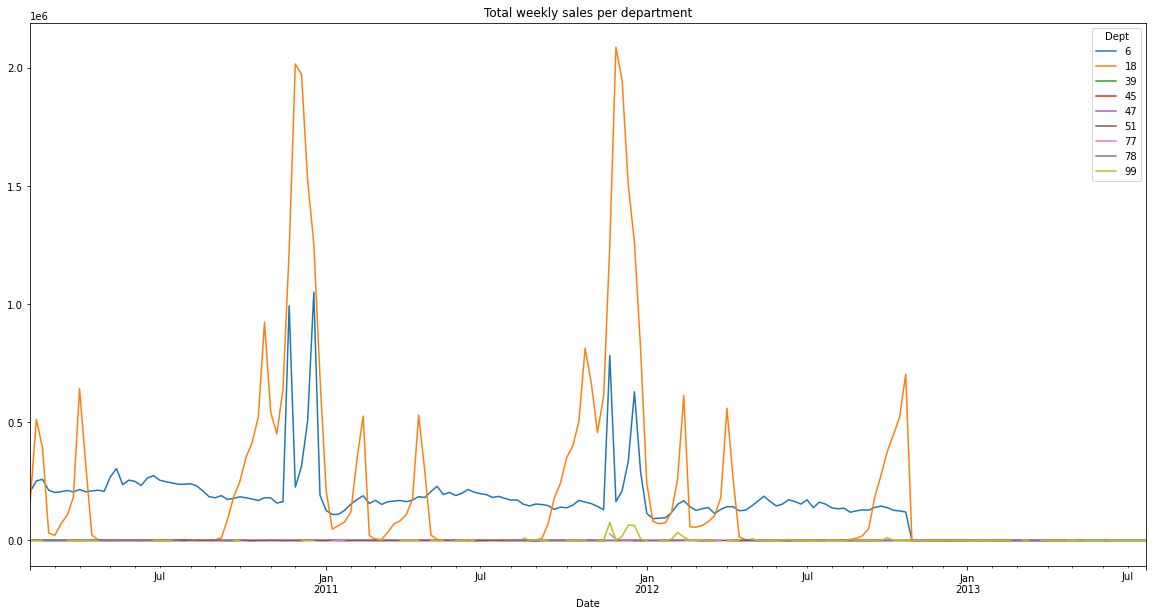

In [32]:
# plotting weekly sales per selected department
group[group['Dept'].isin(deps_with_spikes)].pivot_table(values='Weekly_Sales', index='Date', columns='Dept').plot(figsize=(20,10), title='Total weekly sales per department')
plt.show()

From above, we can clearly see the significant contribution of department number 6 and 18. We can see the sales in these departments are seasonal:
- Dept 18 spikes evey mid-February, April and October - December with the highest peak during December.
- Dept 6 spikes every end of November and end of December while maintaining a steady sale over the remaining periods. This could indicate that this department contains necessities such as food and beverages for example, with an increase demand on Turkeys during thanksgiving.

# Correlation between store Type and Total weekly sales
Previously, we noticed that there is some correlation between store type and store size, type C has small sized store, B has small to mid sized stores while A has large stores in general (there maybe outliers, few small stores could have been misclassified). Below we will see whether the type of a store would affect the weekly sales.

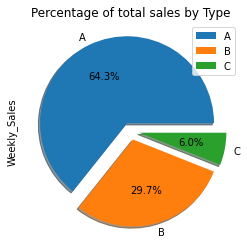

In [33]:
df[['Type','Weekly_Sales']].groupby('Type').sum().plot.pie(y='Weekly_Sales', title='Percentage of total sales by Type',\
                                                          autopct='%1.1f%%', shadow=True, explode=(0.1,0.1,0.1))
plt.show()

From the pie chart above, we can see that type A stores in total generated the most sales, followed by B then C

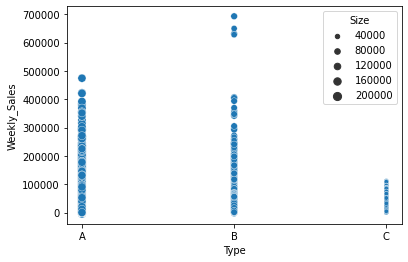

In [34]:
sns.scatterplot(x=df['Type'],y=df['Weekly_Sales'],size=df['Size'])
plt.show()

In [35]:
df[df['Weekly_Sales']>600_000]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
114539,10,72,2010-11-26,693099.36,True,B,126512,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003
118287,10,72,2011-11-25,630999.19,True,B,126512,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874
423646,35,72,2010-11-26,627962.93,True,B,103681,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763
427105,35,72,2011-11-25,649770.18,True,B,103681,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745


However, according to the scatter plot above, some type B stores achieved the highest weekly sales recorded, all the sales were during holiday season.

# correlation of Unemployment and CPI on sales

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

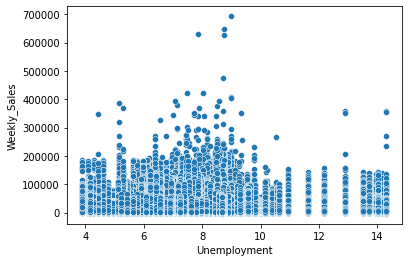

In [36]:
sns.scatterplot(x=df['Unemployment'],y=df['Weekly_Sales'])

As seen in the plot above, there are more high value weekly sales between the unemployment rate of 5 and 10. An explaination for this could be due to the significant volume of sales which occur in inflated regions as the CPI is the highest (the hovering cloud) in some regions where unemployment rate ranges from 5 to 10.

<AxesSubplot:xlabel='Unemployment', ylabel='CPI'>

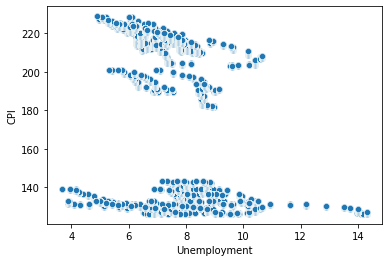

In [37]:
sns.scatterplot(x=df['Unemployment'],y=df['CPI'])

# Question answers

1- Imagine that you are a data scientist in Walmart and your first task is to analyze this dataset. Provide the business insights you find most compelling in this dataset.
- Type C stores generated the most sales in total, however, store 10 and 35 (type B) achieved the highes weekly sales record.
- Department 18 generated most sales during holidays (super bowl, labor day, thanksgiving and christmas).
- Department 6 is the most consistant in weekly sales (helps in the long term stability of the stores).
- The average pay for a basket of goods is less in few stores which are located in a region with high unemployment rate.

2- Describe your approach if you have been asked to build an ML model to forecast the sales. 
- In case external information(CPI, Temperature,  Unemployment rate, etc) is used, there is a major concern about the consistancy and availability of these data in the long term as the model will be reliant on these data. However, best case scenario is asumed.

- First step is to make two new features (Day and Month) as it plays a major role in detecting holiday seasons.

- The weekly sales of the next week for each datapoint (t+1) becomes the target for the current timestamp (t)

- Deal with missing values in all markdown columns. Since the missing perentage is higher than 50% for all of them, existing values are converted to 1 to indicate presence and missing values are converted to 0 to indicate that it is missing. Store Type and Size could be leveraged to fill missing values in "Unemployment rate" and "CPI", otherwise, fill with the mean since they are below 7% of missing values.

- Most of the distribution in the dataset are skewed, applying log transform might help getting closer to a normal distribution (for continuos features).

- preparing data for modeling (separating X and y)

- A Decission tree regressor could be used to fit on the data (it can handle both categorical and continuous features)

- Uppon receiving a new datapoint, it is preprocessed using the same method, and the inverse log transform is applied to the result to obtain the value of the predicted price.

- Ulternatively, time series models such as SARIMA could be used to model the sales data (only weekly sales and date feature is needed).

